In [1]:
# импорт необходимых библиотек
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

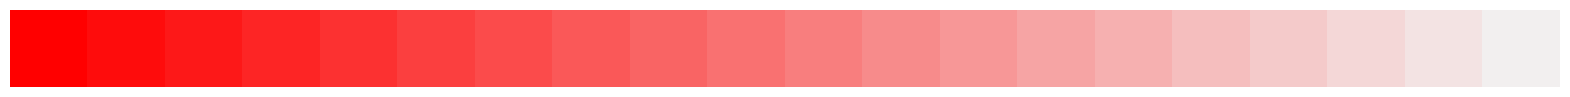

In [2]:
# задание палитры цветов
color_palette = sns.light_palette('red', n_colors=20, reverse=True)
sns.palplot(color_palette)
plt.box(on=None)
plt.xticks([])
plt.show()

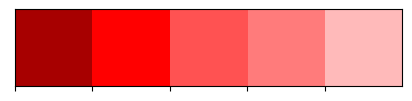

In [3]:
# задание палитры цветов
colors = ['#a70000', '#ff0000', '#ff5252', '#ff7b7b', '#ffbaba']
sns.palplot(sns.color_palette(colors))

In [4]:
import matplotlib.colors as mcolors


def make_colormap(seq):
    
    """ функция создания пользовательского
            масштабируемого цвета """
    
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

In [109]:
# задание палитры цветов красного
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('darkred'), c('brown'), 0.20, c('brown'), c('red'), 0.40, c('red'), \
                     c('indianred'), 0.60, c('indianred'), c('lightcoral'), 0.80, c('lightcoral')])

In [111]:
# задание палитры цветов красного
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('darkred'), c('brown'), 0.80, c('brown'), c('red'), 0.60, c('red'), \
                     c('indianred'), 0.40, c('indianred'), c('lightcoral'), 0.20, c('lightcoral')][::-1])

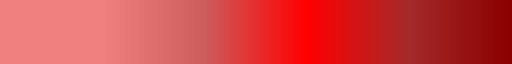

In [112]:
# вывод пользовательской палитры
rvb

In [7]:
# считывание данных с геоданными Московской агломерации
adm = pd.read_csv('data_clean/adm.csv')

In [8]:
# вывод данных
adm.head()

,geometry,cell_zid,adm_name,okrug_name,sub_ter,area,conts_zid
0,MULTIPOLYGON (((38.6495389842383 54.2597139180...,0,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
1,MULTIPOLYGON (((38.6549362377517 54.2572466621...,1,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
2,MULTIPOLYGON (((38.6625773861122 54.2560891872...,2,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
3,MULTIPOLYGON (((38.670279125503 54.25708620909...,3,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
4,MULTIPOLYGON (((38.6779821287111 54.2581143832...,4,Серебряные пруды,Серебряные пруды,Московская область,0.25,1


In [9]:
# импорт библиотеки для работы с географическими координатами
from shapely import wkt

In [10]:
# преобразование признака в географические координаты
adm['geometry'] = adm['geometry'].apply(wkt.loads)

In [11]:
# задание геометрии DataFrame
adm = adm.set_geometry('geometry')

In [12]:
# расчет центров сектора
adm['centroid'] = adm['geometry'].centroid

### Анализ динамики перемещения населения по секторам Московской агломерации

In [13]:
# считывание данных динамики перемещения населения
cmatrix = pd.read_csv('data/03_CMatrix_202109.csv')

In [14]:
# вывод данных
cmatrix.head()

,is_vacation,time_interval,departure_zid,arrival_zid,median_customers_cnt,median_customers_cnt_metro,median_customers_cnt_home_work,median_customers_cnt_work_home
0,0,1,32909,39217,1.0,0.0,0.0,0.0
1,0,1,32909,116651,1.0,1.0,0.0,0.0
2,0,1,32910,37228,1.0,0.0,0.0,0.0
3,0,1,33261,33261,1.0,0.0,0.0,0.0
4,0,1,33262,35370,1.0,0.0,0.0,0.0


In [15]:
# проверка на наличие пропусков
cmatrix.isna().sum()

is_vacation                       0
time_interval                     0
departure_zid                     0
arrival_zid                       0
median_customers_cnt              0
median_customers_cnt_metro        0
median_customers_cnt_home_work    0
median_customers_cnt_work_home    0
dtype: int64

In [16]:
# тип данных
cmatrix.dtypes

is_vacation                         int64
time_interval                       int64
departure_zid                       int64
arrival_zid                         int64
median_customers_cnt              float64
median_customers_cnt_metro        float64
median_customers_cnt_home_work    float64
median_customers_cnt_work_home    float64
dtype: object

In [17]:
# размерность данных
cmatrix.shape

(65062129, 8)

In [18]:
# признаки данных
cmatrix.columns

Index(['is_vacation', 'time_interval', 'departure_zid', 'arrival_zid',
       'median_customers_cnt', 'median_customers_cnt_metro',
       'median_customers_cnt_home_work', 'median_customers_cnt_work_home'],
      dtype='object')

In [19]:
'median_customers_cnt'.replace('median_customers_', '')

'cnt'

In [20]:
# переименование признаков
cmatrix.columns = [column.replace('median_customers_', '') for column in cmatrix.columns]

In [21]:
# проверка изменений
cmatrix.columns

Index(['is_vacation', 'time_interval', 'departure_zid', 'arrival_zid', 'cnt',
       'cnt_metro', 'cnt_home_work', 'cnt_work_home'],
      dtype='object')

In [22]:
# расчет отношения соответствия секторов
(cmatrix['departure_zid'] == cmatrix['arrival_zid']).sum() / cmatrix.shape[0] *100

0.12154689865743558

Количество данных где перемещение происходит в рамках одного сектора не значительно

In [23]:
# признак значения выходного дня
cmatrix['is_vacation'].unique()

array([0, 1], dtype=int64)

In [24]:
# соответствие кодировки данным
data_is_vacation = {0 : 'рабочий', 1 : 'выходной'}

In [25]:
# преобразование признака
cmatrix['is_vacation'] = cmatrix['is_vacation'].map(data_is_vacation)

In [26]:
# временные интервалы
cmatrix['time_interval'].unique()

array([1, 2, 3, 4], dtype=int64)

In [27]:
# данные кодировки интервалов
time_interval = {1 : '0-6', 2 : '6-12', 3 : '12-18', 4 : '18-24'}

In [28]:
# преобразование признака
cmatrix['time_interval'] = cmatrix['time_interval'].map(time_interval)

In [29]:
# вывод данных
cmatrix.head()

,is_vacation,time_interval,departure_zid,arrival_zid,cnt,cnt_metro,cnt_home_work,cnt_work_home
0,рабочий,0-6,32909,39217,1.0,0.0,0.0,0.0
1,рабочий,0-6,32909,116651,1.0,1.0,0.0,0.0
2,рабочий,0-6,32910,37228,1.0,0.0,0.0,0.0
3,рабочий,0-6,33261,33261,1.0,0.0,0.0,0.0
4,рабочий,0-6,33262,35370,1.0,0.0,0.0,0.0


In [130]:
# показатели динамики перемещения
indicators = cmatrix.columns[4:]
indicators

Index(['cnt', 'cnt_metro', 'cnt_home_work', 'cnt_work_home'], dtype='object')

### Анализ изменения плотности населения одного из округа

In [31]:
# выборка секторов по Троицкому административному округу
troitsky_adm_zid = adm.query('okrug_name == "Троицкий административный округ"')['adm_name'].index
troitsky_adm_zid

Int64Index([34254, 34256, 34258, 34260, 34623, 34624, 34625, 34626, 34628,
            34630,
            ...
            88561, 88563, 89205, 89207, 89209, 89211, 89216, 89218, 89854,
            89856],
           dtype='int64', length=5114)

In [32]:
# выборка данных по выбранному округу
troitsky_okrug = cmatrix[cmatrix['departure_zid'].isin(troitsky_adm_zid)]

In [33]:
# вывод данных
troitsky_okrug.head()

,is_vacation,time_interval,departure_zid,arrival_zid,cnt,cnt_metro,cnt_home_work,cnt_work_home
275,рабочий,0-6,35016,35016,1.0,0.0,0.0,0.0
276,рабочий,0-6,35016,35018,1.0,0.0,0.0,0.0
277,рабочий,0-6,35016,35371,0.0,0.0,0.0,0.0
278,рабочий,0-6,35016,35727,1.0,0.0,0.0,0.0
279,рабочий,0-6,35016,36832,1.0,0.0,0.0,0.0


In [34]:
# размерность данных
troitsky_okrug.shape

(589033, 8)

In [35]:
# объединение данных с данными административных районов
troitsky_okrug = troitsky_okrug.merge(adm, left_on='departure_zid', right_on='cell_zid') \
                 .merge(adm, left_on='arrival_zid', right_on='cell_zid', suffixes=('_departure', '_arrival'))
troitsky_okrug.head()

,is_vacation,time_interval,departure_zid,arrival_zid,cnt,cnt_metro,cnt_home_work,cnt_work_home,geometry_departure,cell_zid_departure,...,conts_zid_departure,centroid_departure,geometry_arrival,cell_zid_arrival,adm_name_arrival,okrug_name_arrival,sub_ter_arrival,area_arrival,conts_zid_arrival,centroid_arrival
0,рабочий,0-6,35016,35016,1.0,0.0,0.0,0.0,"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,...,1,POINT (37.02234 55.16945),"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.02234 55.16945)
1,рабочий,6-12,35016,35016,1.0,0.0,0.0,0.0,"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,...,1,POINT (37.02234 55.16945),"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.02234 55.16945)
2,рабочий,12-18,35016,35016,2.0,0.0,0.0,0.0,"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,...,1,POINT (37.02234 55.16945),"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.02234 55.16945)
3,рабочий,18-24,35016,35016,1.0,0.0,0.0,0.0,"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,...,1,POINT (37.02234 55.16945),"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.02234 55.16945)
4,выходной,0-6,35016,35016,1.0,0.0,0.0,0.0,"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,...,1,POINT (37.02234 55.16945),"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.02234 55.16945)


In [36]:
# размерность после объединения
troitsky_okrug.shape

(1031207, 24)

Размерность данных изменилась. Ранее при анализе геоданных Московской агломерации было установлено, что в отдельные сектора попадают границы нескольких административных районов. При этом площадь административных районов не всегда пропорциональна друг другу. В результате чего при объединении данных происходит искажение изменения численности населения.

In [37]:
# выборка данных по выбранному округу
troitsky_okrug = troitsky_okrug[troitsky_okrug['okrug_name_departure'] == 'Троицкий административный округ']

In [38]:
# размерность данных
troitsky_okrug.shape

(419630, 24)

In [39]:
# признаки данных
troitsky_okrug.columns

Index(['is_vacation', 'time_interval', 'departure_zid', 'arrival_zid', 'cnt',
       'cnt_metro', 'cnt_home_work', 'cnt_work_home', 'geometry_departure',
       'cell_zid_departure', 'adm_name_departure', 'okrug_name_departure',
       'sub_ter_departure', 'area_departure', 'conts_zid_departure',
       'centroid_departure', 'geometry_arrival', 'cell_zid_arrival',
       'adm_name_arrival', 'okrug_name_arrival', 'sub_ter_arrival',
       'area_arrival', 'conts_zid_arrival', 'centroid_arrival'],
      dtype='object')

In [40]:
# удаление лишних признаков
troitsky_okrug.drop(columns=['departure_zid', 'arrival_zid'], inplace=True)

In [41]:
# вывод данных
troitsky_okrug.head()

,is_vacation,time_interval,cnt,cnt_metro,cnt_home_work,cnt_work_home,geometry_departure,cell_zid_departure,adm_name_departure,okrug_name_departure,...,conts_zid_departure,centroid_departure,geometry_arrival,cell_zid_arrival,adm_name_arrival,okrug_name_arrival,sub_ter_arrival,area_arrival,conts_zid_arrival,centroid_arrival
0,рабочий,0-6,1.0,0.0,0.0,0.0,"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,...,1,POINT (37.02234 55.16945),"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.02234 55.16945)
1,рабочий,6-12,1.0,0.0,0.0,0.0,"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,...,1,POINT (37.02234 55.16945),"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.02234 55.16945)
2,рабочий,12-18,2.0,0.0,0.0,0.0,"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,...,1,POINT (37.02234 55.16945),"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.02234 55.16945)
3,рабочий,18-24,1.0,0.0,0.0,0.0,"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,...,1,POINT (37.02234 55.16945),"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.02234 55.16945)
4,выходной,0-6,1.0,0.0,0.0,0.0,"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,...,1,POINT (37.02234 55.16945),"MULTIPOLYGON (((37.01931 55.17168, 37.02530 55...",35016,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.02234 55.16945)


In [42]:
# пересчет показателей изменения численности населения с учетом пересечения секторов
troitsky_okrug[indicators] = troitsky_okrug[indicators].apply(lambda x: x / troitsky_okrug['conts_zid_departure'])

In [43]:
# корреляция признаков перемещения населения
troitsky_okrug_corr = troitsky_okrug[indicators].corr()
troitsky_okrug_corr

,cnt,cnt_metro,cnt_home_work,cnt_work_home
cnt,1.000000,0.130231,0.748458,0.776934
cnt_metro,0.130231,1.000000,0.105002,0.098431
cnt_home_work,0.748458,0.105002,1.000000,0.696671
cnt_work_home,0.776934,0.098431,0.696671,1.000000


C:\Users\rus_k\AppData\Local\Temp\ipykernel_4580\2115850478.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(troitsky_okrug_corr, dtype=np.bool))


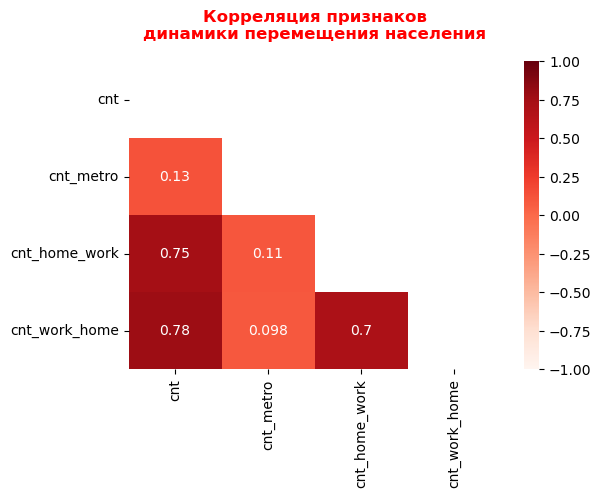

In [44]:
# визуализация корреляции признаков перемещения населения
plt.figure(figsize=(6, 4))
mask = np.triu(np.ones_like(troitsky_okrug_corr, dtype=np.bool))
clocation_corr_heatmap = sns.heatmap(troitsky_okrug_corr, mask=mask, vmin=-1, vmax=1, \
                                     annot=True, cmap='Reds')
clocation_corr_heatmap.set_title('Корреляция признаков\nдинамики перемещения населения', \
                                 c='r', fontweight='bold', fontdict={'fontsize':12}, pad=16);

In [45]:
# корреляции признаков перемещения населения по рабочим дням
troitsky_okrug_is_vacation_corr_no = troitsky_okrug.query('is_vacation == "рабочий"')[indicators].corr()
troitsky_okrug_is_vacation_corr_no

,cnt,cnt_metro,cnt_home_work,cnt_work_home
cnt,1.000000,0.140094,0.746329,0.783222
cnt_metro,0.140094,1.000000,0.110209,0.101404
cnt_home_work,0.746329,0.110209,1.000000,0.673946
cnt_work_home,0.783222,0.101404,0.673946,1.000000


C:\Users\rus_k\AppData\Local\Temp\ipykernel_4580\1335299855.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(troitsky_okrug_is_vacation_corr_no, dtype=np.bool))


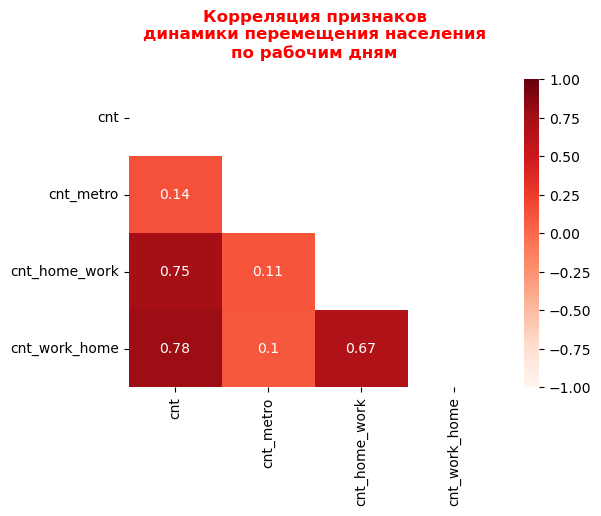

In [46]:
# визуализация корреляции признаков перемещения населения по рабочим дням
plt.figure(figsize=(6, 4))
mask = np.triu(np.ones_like(troitsky_okrug_is_vacation_corr_no, dtype=np.bool))
clocation_corr_heatmap = sns.heatmap(troitsky_okrug_is_vacation_corr_no, mask=mask, vmin=-1, vmax=1, \
                                     annot=True, cmap='Reds')
clocation_corr_heatmap.set_title('Корреляция признаков\nдинамики перемещения населения\nпо рабочим дням', \
                                 c='r', fontweight='bold', fontdict={'fontsize':12}, pad=16);

In [47]:
# корреляции признаков перемещения населения по выходным
troitsky_okrug_is_vacation_corr = troitsky_okrug.query('is_vacation == "выходной"')[indicators].corr()
troitsky_okrug_is_vacation_corr

,cnt,cnt_metro,cnt_home_work,cnt_work_home
cnt,1.000000,0.119492,0.767017,0.779192
cnt_metro,0.119492,1.000000,0.094104,0.092804
cnt_home_work,0.767017,0.094104,1.000000,0.739365
cnt_work_home,0.779192,0.092804,0.739365,1.000000


C:\Users\rus_k\AppData\Local\Temp\ipykernel_4580\4098293657.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(troitsky_okrug_is_vacation_corr, dtype=np.bool))


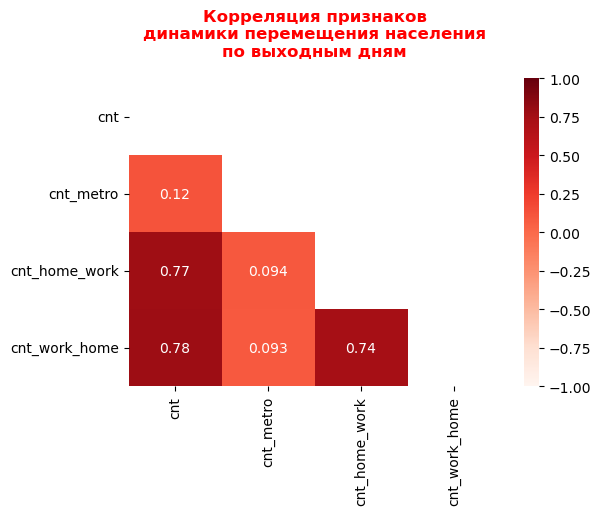

In [48]:
# визуализация корреляции признаков перемещения населения по выходным
plt.figure(figsize=(6, 4))
mask = np.triu(np.ones_like(troitsky_okrug_is_vacation_corr, dtype=np.bool))
clocation_corr_heatmap = sns.heatmap(troitsky_okrug_is_vacation_corr, mask=mask, vmin=-1, vmax=1, \
                                     annot=True, cmap='Reds')
clocation_corr_heatmap.set_title('Корреляция признаков\nдинамики перемещения населения\nпо выходным дням', \
                                 c='r', fontweight='bold', fontdict={'fontsize':12}, pad=16);

In [58]:
# признаки данных 
troitsky_okrug.columns

Index(['is_vacation', 'time_interval', 'cnt', 'cnt_metro', 'cnt_home_work',
       'cnt_work_home', 'geometry_departure', 'cell_zid_departure',
       'adm_name_departure', 'okrug_name_departure', 'sub_ter_departure',
       'area_departure', 'conts_zid_departure', 'centroid_departure',
       'geometry_arrival', 'cell_zid_arrival', 'adm_name_arrival',
       'okrug_name_arrival', 'sub_ter_arrival', 'area_arrival',
       'conts_zid_arrival', 'centroid_arrival'],
      dtype='object')

In [63]:
# доля населения перемещяющихся в рамках своего округа
troitsky_okrug['okrug_name_arrival'].value_counts(normalize=True)[:10]

Троицкий административный округ            0.431437
Новомосковский административный округ      0.130522
Юго-Западный административный округ        0.109068
Западный административный округ            0.071513
Южный административный округ               0.061337
Центральный административный округ         0.056185
Юго-Восточный административный округ       0.031413
Северный административный округ            0.027150
Восточный административный округ           0.024002
Северо-Восточный административный округ    0.021324
Name: okrug_name_arrival, dtype: float64

In [64]:
df = pd.Series([1], index=[1])
df

1    1
dtype: int64

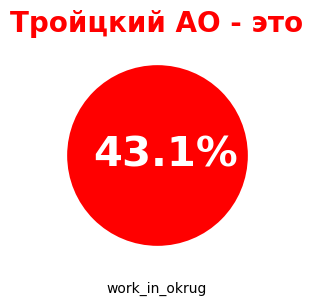

In [65]:
# визуализация количества округов, субъектов и административных районов Московской агломерации
fig, ax = plt.subplots(figsize=(3, 3))
sns.scatterplot(df, x=df.index, y=df.values, size=61.5, \
                sizes=[20000], c='r', legend=False)
plt.annotate('43.1%', xy=(0.97, 0.995), fontsize=30, weight='bold', c='w')
plt.box(on=None)
plt.xticks([])
plt.yticks([])
plt.xlabel('work_in_okrug')
plt.title('Тройцкий АО - это', loc='center', fontweight='bold', color='r', fontsize=20)
plt.show()

In [71]:
# доля населения перемещяющихся в рамках своего административного района
(troitsky_okrug['adm_name_departure'] == troitsky_okrug['adm_name_arrival']).sum() / troitsky_okrug.shape[0] *100

20.326001477492074

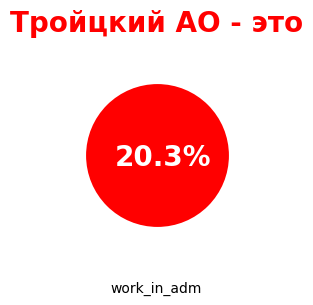

In [72]:
# визуализация количества округов, субъектов и административных районов Московской агломерации
fig, ax = plt.subplots(figsize=(3, 3))
sns.scatterplot(df, x=df.index, y=df.values, size=61.5, \
                sizes=[12500], c='r', legend=False)
plt.annotate('20.3%', xy=(0.98, 0.995), fontsize=20, weight='bold', c='w')
plt.box(on=None)
plt.xticks([])
plt.yticks([])
plt.xlabel('work_in_adm')
plt.title('Тройцкий АО - это', loc='center', fontweight='bold', color='r', fontsize=20)
plt.show()

In [50]:
# показатели динамики перемещения по административным районам в зависимости от рабочего дня
troitsky_okrug_is_vacation = troitsky_okrug.groupby(['adm_name_departure', 'is_vacation'])[indicators].sum()
troitsky_okrug_is_vacation

cnt  cnt_metro  cnt_home_work  \
adm_name_departure  is_vacation                                       
Вороновское         выходной     16668.00    1112.50         180.50   
                    рабочий      25688.75    2216.25         400.25   
Киевский            выходной      6863.25     564.50          69.50   
                    рабочий       8580.00     852.50          84.75   
Кленовское          выходной     17646.75    1566.25         256.75   
                    рабочий      27729.50    3361.75         540.00   
Краснопахорское     выходной     19696.50    1417.50         292.50   
                    рабочий      34991.00    3426.50         630.75   
Михайлово-Ярцевское выходной     10507.00     580.25          85.00   
                    рабочий      17131.00    1271.25         242.75   
Новофедоровское     выходной      9457.00     895.75          95.50   
                    рабочий      16197.50    2007.75         217.50   
Первомайское        выходной      4576.00     237.00          28.50   
                    рабочий       7776.00     648.25          76.25   
Роговское           выходной     23707.50    1409.00         199.00   
                    рабочий      30881.00    2289.50         465.00   
Троицк              выходной     15684.75    1425.25         223.75   
                    рабочий      27982.25    3712.50         609.00   
Щаповское           выходной      5451.25     440.50          40.25   
                    рабочий      10605.25    1053.75         122.25   

                                 cnt_work_home  
adm_name_departure  is_vacation                 
Вороновское         выходной            160.00  
                    рабочий             325.25  
Киевский            выходной             70.75  
                    рабочий              84.50  
Кленовское          выходной            210.00  
                    рабочий             362.25  
Краснопахорское     выходной            225.50  
                    рабочий             495.00  
Михайлово-Ярцевское выходной            111.50  
                    рабочий             222.50  
Новофедоровское     выходной            116.75  
                    рабочий             280.00  
Первомайское        выходной             32.00  
                    рабочий              49.75  
Роговское           выходной            171.50  
                    рабочий             317.50  
Троицк              выходной            215.25  
                    рабочий             375.25  
Щаповское           выходной             48.00  
                    рабочий             104.50

In [75]:
# доля инамики перемещения по административным районам в зависимости от рабочего дня
troitsky_okrug_is_vacation = troitsky_okrug_is_vacation.iloc[:,1:] \
                             .apply(lambda x: round(x / troitsky_okrug_is_vacation['cnt'] * 100, 2))
troitsky_okrug_is_vacation

cnt_metro  cnt_home_work  cnt_work_home
adm_name_departure  is_vacation                                         
Вороновское         выходной          6.67           1.08           0.96
                    рабочий           8.63           1.56           1.27
Киевский            выходной          8.22           1.01           1.03
                    рабочий           9.94           0.99           0.98
Кленовское          выходной          8.88           1.45           1.19
                    рабочий          12.12           1.95           1.31
Краснопахорское     выходной          7.20           1.49           1.14
                    рабочий           9.79           1.80           1.41
Михайлово-Ярцевское выходной          5.52           0.81           1.06
                    рабочий           7.42           1.42           1.30
Новофедоровское     выходной          9.47           1.01           1.23
                    рабочий          12.40           1.34           1.73
Первомайское        выходной          5.18           0.62           0.70
                    рабочий           8.34           0.98           0.64
Роговское           выходной          5.94           0.84           0.72
                    рабочий           7.41           1.51           1.03
Троицк              выходной          9.09           1.43           1.37
                    рабочий          13.27           2.18           1.34
Щаповское           выходной          8.08           0.74           0.88
                    рабочий           9.94           1.15           0.99

In [81]:
# показатель динамики перемещения населения в метро по административным округам
troitsky_okrug_metro = troitsky_okrug_is_vacation[['cnt_metro']].unstack()
troitsky_okrug_metro

cnt_metro        
is_vacation          выходной рабочий
adm_name_departure                   
Вороновское              6.67    8.63
Киевский                 8.22    9.94
Кленовское               8.88   12.12
Краснопахорское          7.20    9.79
Михайлово-Ярцевское      5.52    7.42
Новофедоровское          9.47   12.40
Первомайское             5.18    8.34
Роговское                5.94    7.41
Троицк                   9.09   13.27
Щаповское                8.08    9.94

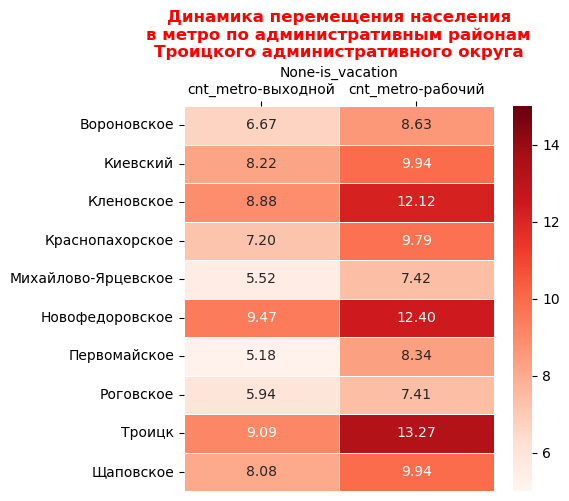

In [92]:
# визуализация показателя динамики перемещения населения в метро по административным округам
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(troitsky_okrug_metro, vmin=5, vmax=15, linewidths=.5, fmt='.2f', annot=True, cmap='Reds', cbar=True)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Динамика перемещения населения\nв метро по административным районам\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.ylabel('')
plt.show()

In [102]:
# показатель динамики перемещения населения дом/работа
troitsky_okrug_work_home = (troitsky_okrug_is_vacation['cnt_home_work'] / troitsky_okrug_is_vacation['cnt_work_home']) \
                            .to_frame().rename(columns={0:'home/work'}).unstack()
troitsky_okrug_work_home

home/work          
is_vacation          выходной   рабочий
adm_name_departure                     
Вороновское          1.125000  1.228346
Киевский             0.980583  1.010204
Кленовское           1.218487  1.488550
Краснопахорское      1.307018  1.276596
Михайлово-Ярцевское  0.764151  1.092308
Новофедоровское      0.821138  0.774566
Первомайское         0.885714  1.531250
Роговское            1.166667  1.466019
Троицк               1.043796  1.626866
Щаповское            0.840909  1.161616

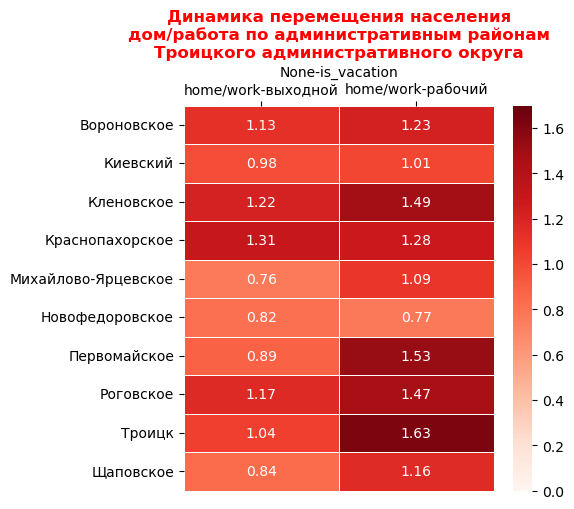

In [114]:
# визуализация показателя динамики перемещения населения дом/работа по административным округам
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(troitsky_okrug_work_home, vmin=0, vmax=1.7, linewidths=.5, fmt='.2f', annot=True, cmap='Reds', cbar=True)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Динамика перемещения населения\nдом/работа по административным районам\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.ylabel('')
plt.show()

In [118]:
# показатели динамики перемещения по административным районам в зависимости от временного интервала
troitsky_okrug_time_interval = troitsky_okrug.groupby(['adm_name_departure', 'time_interval'])[indicators].sum()
troitsky_okrug_time_interval

cnt  cnt_metro  cnt_home_work  \
adm_name_departure  time_interval                                       
Вороновское         0-6             3973.00     101.50          91.00   
                    12-18          15895.75    1389.50         144.50   
                    18-24           9473.50     699.25          78.00   
                    6-12           13014.50    1138.50         267.25   
Киевский            0-6             1491.50      59.75          22.50   
                    12-18           5477.00     573.25          36.50   
                    18-24           3928.25     314.00          45.00   
                    6-12            4546.50     470.00          50.25   
Кленовское          0-6             4338.50      84.50         121.50   
                    12-18          16729.00    2341.75         188.25   
                    18-24           9666.75    1031.25         132.25   
                    6-12           14642.00    1470.50         354.75   
Краснопахорское     0-6             4935.75     237.75         139.50   
                    12-18          19472.00    1770.00         163.75   
                    18-24          12696.75     826.50         119.75   
                    6-12           17583.00    2009.75         500.25   
Михайлово-Ярцевское 0-6             2378.25      48.25          48.50   
                    12-18          10100.00     680.50          61.75   
                    18-24           6361.50     390.75          68.25   
                    6-12            8798.25     732.00         149.25   
Новофедоровское     0-6             2292.00     138.50          33.50   
                    12-18           9628.50    1140.00          76.50   
                    18-24           5629.25     518.75          50.00   
                    6-12            8104.75    1106.25         153.00   
Первомайское        0-6             1165.25      37.25          11.50   
                    12-18           4350.25     321.00          28.25   
                    18-24           2805.50     128.50          16.25   
                    6-12            4031.00     398.50          48.75   
Роговское           0-6             5110.00     262.50         123.50   
                    12-18          19846.00    1344.00         146.50   
                    18-24          12343.00     731.00          84.00   
                    6-12           17289.50    1361.00         310.00   
Троицк              0-6             4124.25     338.25         117.00   
                    12-18          15011.50    1608.25         129.75   
                    18-24           9757.00     876.50         126.25   
                    6-12           14774.25    2314.75         459.75   
Щаповское           0-6             1462.50      47.50          12.50   
                    12-18           5810.75     595.75          37.25   
                    18-24           3221.75     243.25          16.25   
                    6-12            5561.50     607.75          96.50   

                                   cnt_work_home  
adm_name_departure  time_interval                 
Вороновское         0-6                    70.75  
                    12-18                 170.00  
                    18-24                 137.50  
                    6-12                  107.00  
Киевский            0-6                    14.00  
                    12-18                  47.25  
                    18-24                  60.25  
                    6-12                   33.75  
Кленовское          0-6                    68.75  
                    12-18                 228.00  
                    18-24                 155.00  
                    6-12                  120.50  
Краснопахорское     0-6                    72.00  
                    12-18                 288.00  
                    18-24                 221.50  
                    6-12                  139.00  
Михайлово-Ярцевское 0-6                    53.00  
    

In [119]:
# доля инамики перемещения по административным районам в зависимости от рабочего дня
troitsky_okrug_time_interval = troitsky_okrug_time_interval.iloc[:,1:] \
                             .apply(lambda x: round(x / troitsky_okrug_time_interval['cnt'] * 100, 2))
troitsky_okrug_time_interval

cnt_metro  cnt_home_work  cnt_work_home
adm_name_departure  time_interval                                         
Вороновское         0-6                 2.55           2.29           1.78
                    12-18               8.74           0.91           1.07
                    18-24               7.38           0.82           1.45
                    6-12                8.75           2.05           0.82
Киевский            0-6                 4.01           1.51           0.94
                    12-18              10.47           0.67           0.86
                    18-24               7.99           1.15           1.53
                    6-12               10.34           1.11           0.74
Кленовское          0-6                 1.95           2.80           1.58
                    12-18              14.00           1.13           1.36
                    18-24              10.67           1.37           1.60
                    6-12               10.04           2.42           0.82
Краснопахорское     0-6                 4.82           2.83           1.46
                    12-18               9.09           0.84           1.48
                    18-24               6.51           0.94           1.74
                    6-12               11.43           2.85           0.79
Михайлово-Ярцевское 0-6                 2.03           2.04           2.23
                    12-18               6.74           0.61           1.23
                    18-24               6.14           1.07           1.63
                    6-12                8.32           1.70           0.61
Новофедоровское     0-6                 6.04           1.46           1.79
                    12-18              11.84           0.79           1.58
                    18-24               9.22           0.89           2.47
                    6-12               13.65           1.89           0.80
Первомайское        0-6                 3.20           0.99           0.56
                    12-18               7.38           0.65           0.80
                    18-24               4.58           0.58           0.87
                    6-12                9.89           1.21           0.40
Роговское           0-6                 5.14           2.42           1.15
                    12-18               6.77           0.74           0.95
                    18-24               5.92           0.68           1.17
                    6-12                7.87           1.79           0.56
Троицк              0-6                 8.20           2.84           0.98
                    12-18              10.71           0.86           1.52
                    18-24               8.98           1.29           2.14
                    6-12               15.67           3.11           0.76
Щаповское           0-6                 3.25           0.85           1.13
                    12-18              10.25           0.64           1.11
                    18-24               7.55           0.50           1.63
                    6-12               10.93           1.74           0.35

In [120]:
# показатель динамики перемещения населения в метро по административным округам
troitsky_okrug_metro = troitsky_okrug_time_interval[['cnt_metro']].unstack()
troitsky_okrug_metro

cnt_metro                     
time_interval             0-6  12-18  18-24   6-12
adm_name_departure                                
Вороновское              2.55   8.74   7.38   8.75
Киевский                 4.01  10.47   7.99  10.34
Кленовское               1.95  14.00  10.67  10.04
Краснопахорское          4.82   9.09   6.51  11.43
Михайлово-Ярцевское      2.03   6.74   6.14   8.32
Новофедоровское          6.04  11.84   9.22  13.65
Первомайское             3.20   7.38   4.58   9.89
Роговское                5.14   6.77   5.92   7.87
Троицк                   8.20  10.71   8.98  15.67
Щаповское                3.25  10.25   7.55  10.93

In [121]:
# максимальное значение признака для визуализации
troitsky_okrug_metro.max().max()

15.67

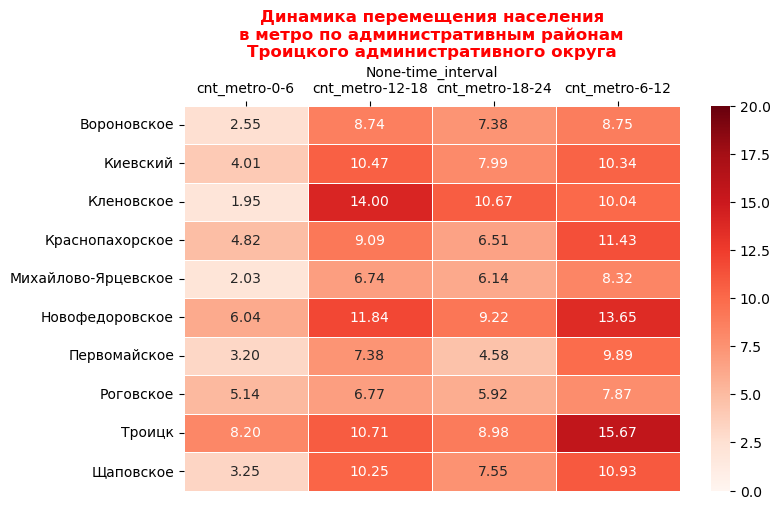

In [124]:
# визуализация показателя динамики перемещения населения в метро по административным округам
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(troitsky_okrug_metro, vmin=0, vmax=20, linewidths=.5, fmt='.2f', annot=True, cmap='Reds', cbar=True)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Динамика перемещения населения\nв метро по административным районам\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.ylabel('')
plt.show()

In [125]:
# показатель динамики перемещения населения дом/работа
troitsky_okrug_work_home = (troitsky_okrug_time_interval['cnt_home_work'] / troitsky_okrug_time_interval['cnt_work_home']) \
                            .to_frame().rename(columns={0:'home/work'}).unstack()
troitsky_okrug_work_home

home/work                              
time_interval             0-6     12-18     18-24      6-12
adm_name_departure                                         
Вороновское          1.286517  0.850467  0.565517  2.500000
Киевский             1.606383  0.779070  0.751634  1.500000
Кленовское           1.772152  0.830882  0.856250  2.951220
Краснопахорское      1.938356  0.567568  0.540230  3.607595
Михайлово-Ярцевское  0.914798  0.495935  0.656442  2.786885
Новофедоровское      0.815642  0.500000  0.360324  2.362500
Первомайское         1.767857  0.812500  0.666667  3.025000
Роговское            2.104348  0.778947  0.581197  3.196429
Троицк               2.897959  0.565789  0.602804  4.092105
Щаповское            0.752212  0.576577  0.306748  4.971429

In [128]:
# максимальное значение признака для визуализации
troitsky_okrug_work_home.max().max()

4.9714285714285715

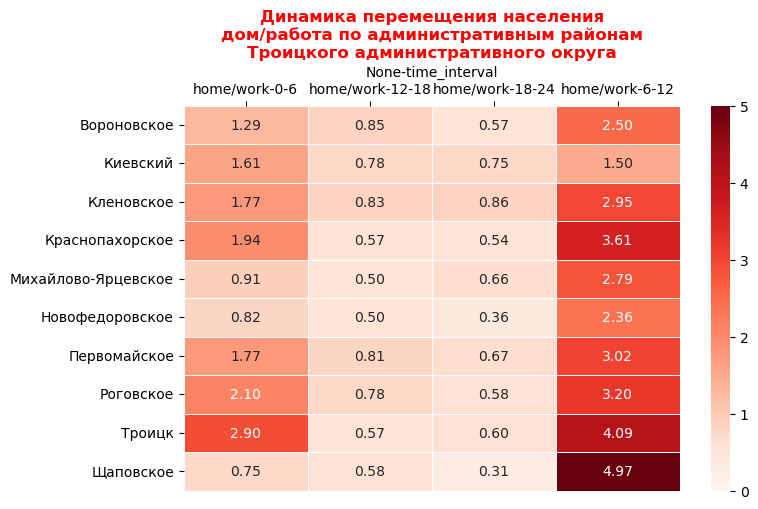

In [129]:
# визуализация показателя динамики перемещения населения дом/работа по административным округам
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(troitsky_okrug_work_home, vmin=0, vmax=5, linewidths=.5, fmt='.2f', annot=True, cmap='Reds', cbar=True)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Динамика перемещения населения\nдом/работа по административным районам\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.ylabel('')
plt.show()

In [137]:
# рассчет расстояния перемещения
troitsky_okrug['centroid_departure'].iloc[33].distance(troitsky_okrug['centroid_arrival'].iloc[33])

0.053020730566276236

In [138]:
# рассчет расстояния перемещения
troitsky_okrug['distance'] = [point_home.distance(point_work) \
                           for point_home, point_work in zip(troitsky_okrug['centroid_departure'].values, \
                                                             troitsky_okrug['centroid_arrival'].values)]

In [139]:
# расчет средней дистанции перемещения по административным районам
troitsky_okrug.groupby('adm_name_departure')['distance'].mean().sort_values(ascending=True)

adm_name_departure
Щаповское              0.206871
Троицк                 0.227300
Краснопахорское        0.234084
Первомайское           0.236540
Кленовское             0.256482
Вороновское            0.280395
Михайлово-Ярцевское    0.281492
Новофедоровское        0.434206
Роговское              0.437510
Киевский               0.530515
Name: distance, dtype: float64

In [140]:
# рейтинг административных районов
troitsky_okrug_adm_work_rank = troitsky_okrug.groupby('adm_name_departure')['distance'].mean() \
                               .sort_values(ascending=True).rank(ascending=False)
troitsky_okrug_adm_work_rank

adm_name_departure
Щаповское              10.0
Троицк                  9.0
Краснопахорское         8.0
Первомайское            7.0
Кленовское              6.0
Вороновское             5.0
Михайлово-Ярцевское     4.0
Новофедоровское         3.0
Роговское               2.0
Киевский                1.0
Name: distance, dtype: float64

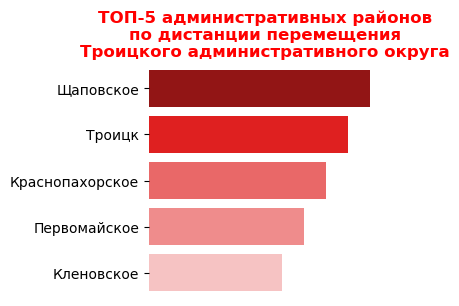

In [142]:
# визуализация рейтинг административных районов
plt.figure(figsize=(3,3))
sns.barplot(x = troitsky_okrug_adm_work_rank.values[:5], y = troitsky_okrug_adm_work_rank.index[:5], \
            palette=sns.color_palette(colors))
plt.title('ТОП-5 административных районов\nпо дистанции перемещения\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [143]:
# антирейтинг административных районов
troitsky_okrug_adm_work_rank = troitsky_okrug.groupby('adm_name_departure')['distance'].mean() \
                               .sort_values(ascending=False).rank(ascending=True)
troitsky_okrug_adm_work_rank

adm_name_departure
Киевский               10.0
Роговское               9.0
Новофедоровское         8.0
Михайлово-Ярцевское     7.0
Вороновское             6.0
Кленовское              5.0
Первомайское            4.0
Краснопахорское         3.0
Троицк                  2.0
Щаповское               1.0
Name: distance, dtype: float64

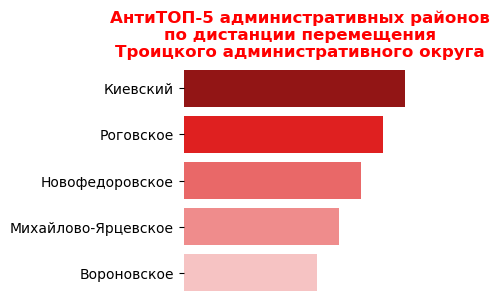

In [144]:
# визуализация рейтинг административных районов
plt.figure(figsize=(3,3))
sns.barplot(x = troitsky_okrug_adm_work_rank.values[:5], y = troitsky_okrug_adm_work_rank.index[:5], \
            palette=sns.color_palette(colors))
plt.title('АнтиТОП-5 административных районов\nпо дистанции перемещения\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()